# TP3 : Fonctions à plusieurs variables

# I. Un petit tour sur les fonctions quadratiques

Considérons une fonction quadratique de $\mathbb{R}^2$ générique, de la forme

$$
f(x) = \frac{1}{2}\langle Ax,x \rangle + \langle b,x \rangle + c.
$$

Cette fonction dépend d'une matrice 
$A = \begin{pmatrix}
    A_{11} & A_{12} \\
    A_{21} & A_{22}
\end{pmatrix}$,
d'un vecteur $b = \begin{pmatrix}
    b_{1} \\
    b_{2}
\end{pmatrix}$, 
et d'une constante $c \in \mathbb{R}$, que l'on supposera toujours nulle, pour simplifier.

Essayons de voir à quoi ressemblent ces fonctions quadratiques :


In [2]:
import autograd.numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

from scripts.nice_functions import widget_quadratic

In [3]:
widget_quadratic()

AppLayout(children=(GridspecLayout(children=(FloatSlider(value=2.0, description='$A_{11}$', layout=Layout(grid…

Vous devriez voir apparaitre une parabole en 3D, avec des boutons manipulables. Si ce n'est pas le cas, c'est certainement que vous n'êtes pas sur mybinder.org, voir [la page du TP](https://gitlab.math.univ-paris-diderot.fr/garrigos/l3optim-tp/-/blob/master/README.md).

Le graphe que vous voyez est celui d'une fonction quadratique. Vous pouvez:
- Cliquer sur le graphe et le déplacer pour changer l'angle de la caméra
- Manipuler les boutons au-dessus du graphe pour modifier les coefficients de $A$ et $b$ déterminant la fonction quadratique
- Selon votre PC il se pourrait qu'il y ait des incompatibilités de résolution et que l'image soit trop petite/grande. Vous pouvez modifier sa taille en tirant sur le petit triangle gris en bas à droite.

**I.1)** Amusez-vous un peu avec cet outil, et profitez-en pour vous forger une opinion sur les points suivants:
- Observer à quoi ressemble le graphe lorsque la matrice $A$ est définie positive, positive, non définie, négative ou définie négative. 
- Que constatez-vous lorsque $A$ est antisymétrique? Comment l'expliquez-vous?
- Quelles propriétés faut-il que $A$ vérifie pour que la fonction $f$ aie un unique minimiseur?
- Quelles propriétés faut-il que $A$ vérifie pour que la fonction $f$ aie au moins minimiseur? Etes-vous sûrs?
- Trouver $A$ symétrique et $b$ tels que $b \notin Im(A)$. Que constatez-vous? Pouvez-vous l'expliquer par un résultat du cours?
- Trouver des matrices $A$ positives (non définies poitives) telles que $(0,0)$ soit: un minimiseur global, un maximiseur local, ni l'un ni l'autre. 
- Pour quelles valeurs de $A$ et $b$ la fonction $f$ est-elle convexe? strictement convexe? Pouvez-vous l'expliquer par un résultat du cours?

**I.2)** On s'intéresse maintenant aux *courbes de niveau* d'une fonction. Etant donné une fonction $f : \mathbb{R}^N \longrightarrow \mathbb{R}$, les courbes/ensembles de niveau de $f$ sont tous les ensembles

$$
[f = r] := \{ x \in \mathbb{R}^N \ | \ f(x) = r \}, \text{ où } r \in \mathbb{R}.
$$

Vous êtes certainement familiers avec les courbes de niveau en cartographie, qui permettent de représenter les variations de l'élévation/altitude dans un montagne ou une vallée.

|  |  |
| --- | --- |
| ![](https://uncailloudanslachaussure.ch/wp-content/uploads/2019/02/imagesqsq-2-d3bf9.jpg) | ![](https://uncailloudanslachaussure.ch/wp-content/uploads/2019/02/IMG_3418.jpg) |
| | Utilisation des courbes de niveau en cartographie ([Source](https://uncailloudanslachaussure.ch/courbes-de-niveau/)) |


On peut également dessiner ces ensembles de niveau pour les fonctions de $\mathbb{R}^2$ dans $\mathbb{R}$. Intéressons-nous pour l'instant aux fonctions quadratiques:

In [4]:
widget_quadratic(graph=True, levelset=True)

AppLayout(children=(GridspecLayout(children=(FloatSlider(value=2.0, description='$A_{11}$', layout=Layout(grid…

A quoi ressemblent les courbes de niveau au voisinage de $(0,0)$ lorsque $(0,0)$ est un minimiseur? Un point selle critique? Un point selle non critique?

**I.3)** On s'intéresse maintenant au gradient de notre fonction $f : \mathbb{R}^2 \longrightarrow \mathbb{R}$, qui est une fonction $\nabla f : \mathbb{R}^2 \longrightarrow \mathbb{R}^2$. 

**Attention:** prenez garde à ne pas confondre $\nabla f(x)$, le gradient de $f$ en un point $x$, qui est un vecteur, et $\nabla f$ qui est une fonction.

Les applications de $\mathbb{R}^N$ dans lui-même sont parfois appelées *champ de vecteurs*, ce qui explique pourquoi on parle parfois de *champ gradient* pour désigner $\nabla f$. 
On parle de champ car une façon bien commode de représenter un champ gradient dans $\mathbb{R}^N$ est de tracer en un nombre fini de points $x_1, \dots, x_p$ la direction dans laquelle pointe $\nabla f(x_i)$.

| | Champs de vecteurs : illustration | |
| --- | --- | --- |
| ![](images/vf1.png) | ![](images/vf2.png) | ![](images/vf3.png) |

Regardons à quoi cela corrrespond pour nos fonctions quadratiques:

In [5]:
widget_quadratic(gradient=True, levelset=True)

AppLayout(children=(GridspecLayout(children=(FloatSlider(value=2.0, description='$A_{11}$', layout=Layout(grid…

- A quoi ressemble le champ gradient au voisinage des points critiques?
- Que pouvez-vous dire de l'orientation des flèches représentant le gradient, lorsqu'on les compare aux courbes de niveau?
- Imaginez que ces flèches représentent le déplacement, l'écoulement d'un liquide, et que vous êtes une particule suivant le flot, ou une feuille d'arbre qui flotte sur ce liquide (c'est la minute physique/poésie de ce TP). 
    * Da façon générale, comment varie la valeur de la fonction $f$ lorsque vous vous déplacez?
    * Ou cela vous emporte-il? Vous considèrerez en particulier le cas d'une matrice *définie négative*.
    * Quel lien pouvez-vous faire avec votre observation concernant les courbes de niveau?

|  |
| --- |
| ![](images/flot.png) |

**I.4)** Ce que l'on a observé précédemment nous suggère que *remonter* le flot (c'est-à-dire parcourir le flot en arrière) engendré par le champ de gradient permet de se déplacer en direction des minimiseurs (s'il y en a). 

Ce que l'on veut donc faire, c'est regarder des trajectoires $x(t) \in \mathbb{R}^2$ qui se déplacent dans le temps, et telles qu'en tout point leur dérivée ponctuelle $\dot x(t)$ soit égal à $- \nabla f(x(t))$ (on met un $-$ puisque on veut remonter le flot).

Autrement dit, on s'intéresse aux trajectoires solutions de l'équation différentielle suivante, qu'on appelle *l'équation du flot gradient*: 

$$
\dot x(t) = - \nabla f(x(t)), \ x(0) = x_0 .
$$

Va-t-on résoudre cette équation différentielle? Non. Peut-on visualiser ses solutions (approximatives) grâce au calcul? Oui:




In [6]:
widget_quadratic(graph=True, levelset=True,  flow=True, density=0.9)

AppLayout(children=(GridspecLayout(children=(FloatSlider(value=2.0, description='$A_{11}$', layout=Layout(grid…

- Arrivez-vous à lire les trajectoires du flot gradient? 
- Vers où se dirigent ces trajectoires? Dans le cas défini positif? Dans le cas non défini?


En pratique, on ne calcule jamais les solutions exactes de cette équation différentielle $\dot x(t) = - \nabla f(x(t))$, car il est souvent impossible d'en trouver une solution explicite.

Par contre, on se satisfait tout à fait de calculer une suite de points qui *approxime* cette trajectoire. Pour cela, on remplace cette équation différentielle "en temps continu" par une relation de récurrence "en temps discret":

$$
\frac{x_{t+1} - x_t}{\rho} = - \nabla f(x_t), \ \rho \sim 0,
$$

où $\rho$ est un nombre positif "petit", que l'on appelle le **pas** de l'algorithme (*stepsize* en anglais).
On peut réécrire  cette relation de récurrence comme: 

$$
x_{t+1} = x_t - \rho \nabla f(x_t), \ \rho \sim 0.
$$

C'est ce que l'on appelle **l'algorithme du gradient**, que l'on étudiera en cours, et que l'on reverra plus tard en TP.

# II. Approximation quadratique des fonctions

Maintenant que l'on est bien familier avec les fonctions quadratiques de $\mathbb{R}^2$, intéréssons-nous aux fonctions de $\mathbb{R}^2$ quelconques.

In [8]:
from scripts.nice_functions import plot2d_function

Considérons la fonction $f(x,y) = 2\sin(x/2)\sin(y)$ :

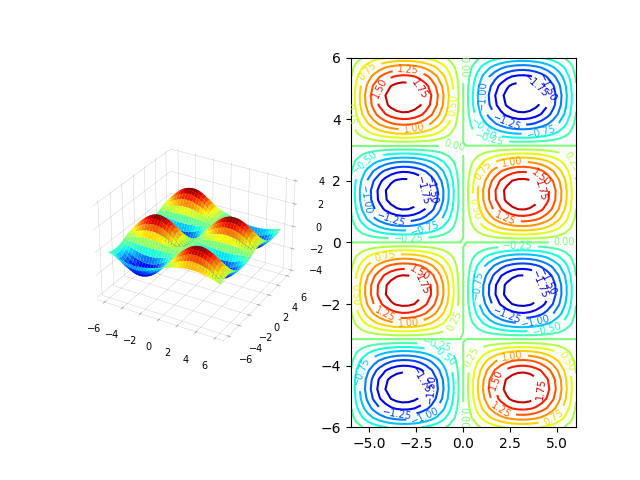

In [9]:
def Waves(z):
    x,y = z
    return 2*np.sin(x/2)*np.sin(y)

plt.figure()
plot2d_function(Waves, graph=True, levelset=True, plot_box=[[-6,6],[-6,6]], grid_size=40)

- Calculez à la main $\nabla f(\bar x)$ et $\nabla^2 f(\bar x)$ en $\bar x = (\pi, -\pi/2)$.
- A quoi ressemble la fonction quadratique $f(x)  = \frac{1}{2}\langle \nabla^2 f(\bar x)x,x \rangle + \langle \nabla f(\bar x), x \rangle$? Que constatez-vous?
- Même questions en $\bar x = (0,0)$.
- Quel résultat vous permet de justifier ce que vous voyez?

**II.2)** Voici une nouvelle fonction, que l'on appelle également la selle de singe: $f(x,y) = \frac{1}{3}x^3 - xy^2$.
En vous inspirant du code de la question précédente, afficher son graphe sur $[-2,2]^2$.


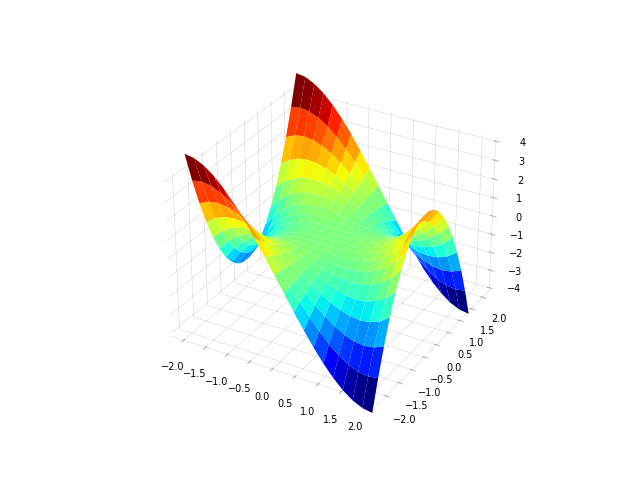

In [10]:
def Monkey(z):
    x,y = z
    return (1/3)*x**3 - x*y**2 

plt.figure()
plot2d_function(Monkey, graph=True, plot_box=[[-2,2],[-2,2]], zlim=(-4,4))

Comme précédemment :
- En inspectant visuellement le graphe, comment qualifieriez-vous le point $\bar x = (0,0)$?
- Calculez à la main $\nabla f(x)$ et $\nabla^2 f(x)$ en $\bar x = (0,0)$.
- A quoi ressemble la fonction quadratique $f(x)  = \frac{1}{2}\langle \nabla^2 f(\bar x)x,x \rangle + \langle \nabla f(\bar x), x \rangle$? 
- Comment expliquez-vous ce qui se passe? (Dans cette situation on dit que le point critique est **dégénéré**)

**II.3)** Le fait que l'on puisse approcher toute fonction lisse par une fonction quadratique donnée par sa hessienne et son gradient est très utile lorsque l'on recherche des minimiseurs!

En effet, si l'on dispose d'un point $x$ qui n'est pas un minimiseur, et que l'on cherche ce dernier (ce qui est difficile), une idée consiste à se dire:

1. remplaçons notre fonction $f$ par son approximation quadratique en $x$, car au voisinage de $x$ ce sont les mêmes
2. minimisons cette approximation quadratique (c'est facile), et remplaçons $x$ par le minimiseur de cette approximation quadratique.

En répétant plusieurs fois cette opération, on espère se rapprocher du minimiseur!

| Approximations quadratiques successives |
| --- |
| ![](images/newton_graph.png) |
| En $x_0$, on approxime la fonction $f$ (en noir) par une quadratique de Taylor (en bleu). Le minimiseur de cette quadratique est $x_1$, point en lequel on peut de nouveau calculer une approximation quadratique de Taylor (en rose). Son minimiseur est $x_2$, et on pourrait continuer ainsi de suite jusqu'à converger vers le minimiseur de $f$. |


Donc, concrètement, on construit une suite de candidats $x_k$ ainsi:

1. On calcule l'approximation quadratique de $f$ en $x_k$. Le théorème de Taylor nous dit que pour $h$ petit on a
$$
f(x_k+h) \simeq q(h) := f(x_k) + \langle \nabla f(x_k) , h \rangle + \frac{1}{2} \langle \nabla^2f(x_k)h,h \rangle.
$$
2. On doit prendre $x_{k+1} = x_k + h$ où $h$ minimise $q$. Or la condition d'optimalité du premier ordre pour cette fonction quadratique $q$ nous dit que $\nabla f(x_k) + \nabla^2f(x_k)h = 0$. Autrement dit, $ h = - \nabla^2f(x_k)^{-1} \nabla f(x_k)$ si la hessienne est inversible. On aboutit alors à la relation de récurrence:

$$
x_{k+1} = x_k - \rho \nabla^2f(x_k)^{-1} \nabla f(x_k), \ \rho >0.
$$

Cette méthode est connue sous le nom de **méthode de Newton** lorsque $\rho =1$. On l'a vue lors du premier TP, et on en reparlera en cours.

Parfois on prend un $\rho$ plus petit, ce qui est équivalent à prendre un vecteur $h$ plus petit, et permet de meiux respecter le fait que l'approximation quadratique est locale.

# III. Pour aller plus loin. Méthode du gradient 

Dans cette dernière partie, on va essayer de minimiser la fonction suivante (qui est un cas particulier de ce que l'on appelle une fonction *logistique*) : 

$$
f(x,y) = \ln(1 + e^{x+y}) + \ln(1 + e^{y-3x}) + \ln(1 + e^{-x-2y}).
$$

A priori, il n'est pas facile de résoudre ce problème par le calcul (avez-vous envie de calculer son gradient puis résoudre $\nabla f(x,y)=0$?).
Je vous propose donc d'essayer deux approches, basées sur deux observations faites dans les parties I. et II.


**III.1)** Ecrire une fonction `Logistique(z)` qui prend en entrée un vecteur $z \in \mathbb{R}^2$ de type `array`, et qui renvoie en sortie un nombre réel correspodant à la valeur de $f$ évaluée en $z$. Puis vous afficherez le graphe et les courbes de niveau de cette fonction. Vous pourrez vous inspirer du code présent dans la section II. Vers où se trouve le minimiseur?

In [11]:
def Logistique(z):
    x,y = z
    return np.log(1 + np.exp( x+y )) + np.log(1 + np.exp( y-3*x )) + np.log(1 + np.exp( -x-2*y ))

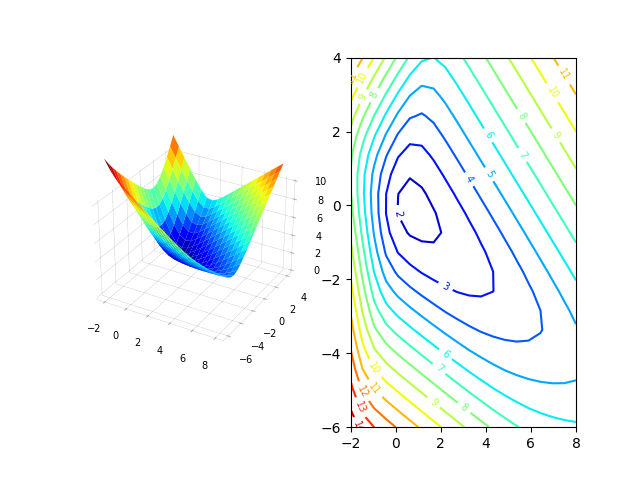

In [12]:
plt.figure()
plot2d_function(Logistique, graph=True, levelset=True, plot_box=[[-2,8],[-6,4]], zlim=(0,10))

**III.2)** Nous allons maintenant implémenter l'algorithme du gradient pour essayer de nous diriger vers le minimiseur de $f$. Rappelons que nous l'avons défini par la relation de réccurence:

$$
x_{t+1} = x_t - \rho \nabla f(x_t), \ \rho \sim 0.
$$

Afin d'implémenter l'algorithme, il nous suffit d'être capable de calculer $\nabla f(x)$.

Or on n'a pas envie de calculer ce gradient à la main! On voudrait plutôt que l'ordinateur s'en chage pour nous. Pour cela, on va faire appel à une librairie de *différenciation automatique*.

In [13]:
import autograd

Comme son nom subtil le suggère, `autograd` permet de calculer automatiquement le gradient d'une fonction Python `f` telle que  `Logistique` :

In [14]:
f = Logistique
df = autograd.grad(f)

Vous disposez maintenant d'une fonction python `df` qui prend en entrée un `array` dans $\mathbb{R}^2$, et renvoie un `array` dans $\mathbb{R}^2$.

**III.2.a)** Définir un $z \in \mathbb{R}^2$ quelconque, et évaluer $f$ et $df$ en $z$. 

**Attention**, `autograd` n'aime pas les entiers `int` et ne veut que des réels `float`. En python, les nombres `2` et `2.0` sont différents...

In [15]:
z = np.array([0.,0.])
f(z)

2.0794415416798357

In [16]:
df(z)

array([-1.5,  0. ])

**III.2.b)** Vérifiez que $(0,0)$ n'est pas un minimiseur de $f$.

In [17]:
df(np.zeros(2))

array([-1.5,  0. ])

**III.2.c)** Maintenant que vous savez calculer le gradient de $f$, écrivez une fonction `algogradient` :
- qui prend en entrée:
    - un point de départ `z0` dans $\mathbb{R}^2$
    - un pas `rho`
    - un nombre d'itérations maximal `itermax`
- qui calcule `itermax` itérations de la suite définie par $x_{k+1} = x_k - \rho \nabla f(x_k)$
- qui renvoie la dernière itération calculée


In [18]:
def algogradient(z0, rho, itermax):
    z = z0
    seq = [z]
    for k in range(itermax):
        z = z - rho * df(z)
        seq.append(z)
    return z, seq

**III.2.d)** Faites tourner votre fonction pendant 100 itérations, avec un pas petit ($\simeq 0.5$) et un point de départ de votre choix. Vérifiez si le point obtenu est un point critique.

In [19]:
sol, seq = algogradient(z0=np.array([3.,-5.]), rho=1, itermax=20)
sol

array([ 0.72537895, -0.10110441])

In [20]:
df(sol)

array([ 2.49707101e-06, -6.95146730e-06])

In [21]:
X = [x[0] for x in seq]
Y = [x[1] for x in seq]
Z = [X,Y]

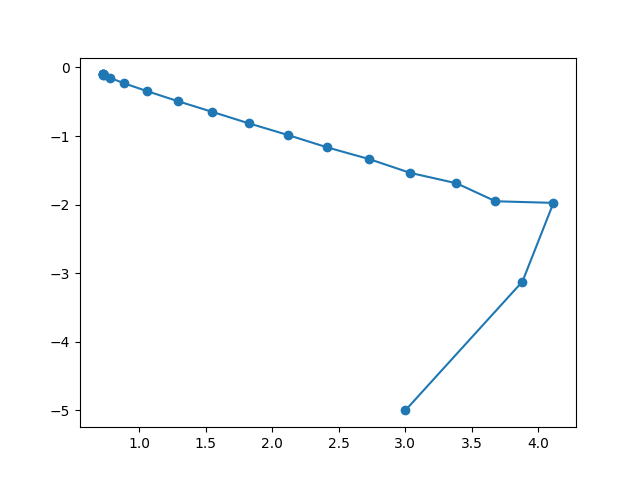

In [22]:
plt.figure()
plt.plot(*Z)
plt.scatter(*Z)

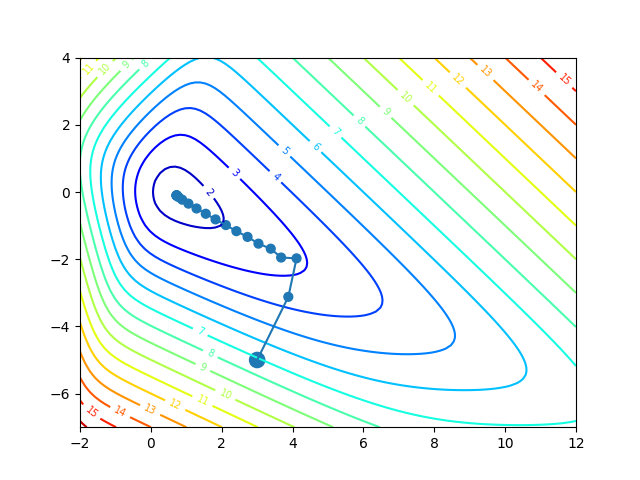

In [23]:
plt.figure()
plot2d_function(Logistique, 
                levelset=True, 
                sequence=Z, 
                plot_box=[[-2,12],[-7,4]], zlim=(0,10), grid_size=100)

**III.3)** Vous pouvez visualiser la méthode du gradient appliquée aux fonctions quadratiques, en utilisant ce widget interactif qui vous permet de déplacer le point de départ $z_0 = (x_0,y_0)$ et de changer le pas (*stepsize*) $\rho$:

In [24]:
widget_quadratic(graph=True, levelset=True,  algo='gradient')

AppLayout(children=(GridspecLayout(children=(FloatSlider(value=2.0, description='$A_{11}$', layout=Layout(grid…

- Observez ce qui se passe lorsque le pas est trop grand
- Pour un pas petit, et en présence de minimiseurs, le fait que l'algorithme converge est-il dépendant du point initial?
- Même question lorsqu'il n'y a pas de minimiseurs

**III.4) BONUS** Vous pouvez essayer de coder également la méthode de Newton mentionnée plus haut! Pour cela tout ce dont vous avez besoin est:
- Avoir accès à la Hessienne de $f$.
    * Vous avez appris en cours que la hessienne est la jacobienne du gradient : $\nabla f(x) = J(\nabla f)(x)$
    * la librairie `autograd` dispose d'une fonction `autograd.jacobian` qui vous permet de calculer la jacobienne d'un champ de vecteurs
- Trouver à chaque itération un $h$ qui vérifie $\nabla f(x_k) + \nabla^2f(x_k)h = 0$. Vous avez déjà vu au TP2 qu'il existe une fonction `np.linalg.solve` pour résoudre des systèmes linéaires.

Vous verrez que cette méthode trouve le minimiseur beaucoup plus rapidement, mais qu'elle peut échouer lorsque le point initial est mal choisi, ou si le pas $\rho$ est trop grand!

In [25]:
ddf = autograd.jacobian(df)

In [26]:
def algonewton(z0, rho, itermax):
    z = z0
    for k in range(itermax):
        h = np.linalg.solve(ddf(z), -df(z))
        z = z + rho * h
    return z

In [27]:
sol = algonewton(np.array([1.,1.]), 0.5, 20)
sol

array([ 0.72537413, -0.10109752])

In [28]:
df(sol)

array([-3.50931529e-07, -4.95707153e-07])

**III.5) BONUS** Si vous le souhaitez, vous pouvez visualiser la méthode de Newton appliquée aux fonctions quadratiques, en utilisant ce widget interactif qui vous permet de déplacer le point de départ $z_0 = (x_0,y_0)$ et de changer le pas (*stepsize*) $\rho$:

In [30]:
widget_quadratic(graph=True, levelset=True,  algo='Newton')

AppLayout(children=(GridspecLayout(children=(FloatSlider(value=2.0, description='$A_{11}$', layout=Layout(grid…

- Lorsque $\rho=1$ et $A$ définie positive, combien faut-il d'itérations à la méthode de Newton pour converger? Sauriez-vous l'expliquer?
- Lorsque $\rho <1$ et $A$ non définie, vers quoi converge l'algorithme? Est-ce similaire à ce que vous avez vu pour la méthode du gradient?
- Lorsque $\rho < 1$, comment se comporte l'algorithme lorsque vous changez $A$? Est-ce similaire à ce que vous avez vu pour la méthode du gradient? Sauriez-vous l'expliquer?

**Fin du TP.** Pensez à télécharger votre notebook si vous souhaitez en garder une trace!